In [ ]:
# 📘 Student Performance Predictor for EduQuest Coaching
print('Hello from YBI Foundation 🚀')

Hello from YBI Foundation 🚀


# The Project Work

Project Title - Student Performance Predictor for EduQuest Coaching

EduQuest Coaching aims to empower its students with personalized learning strategies by implementing a "Student Performance Predictor." This project focuses on developing a machine learning model that predicts student academic performance based on various factors, including past academic records, attendance, engagement in coursework, and demographic information. The system will enable EduQuest Coaching to identify students who may require additional support, tailor educational interventions, and ultimately improve student success rates and retention.

This project will use LinearRegression Model to predict final exam scores.

# 1. Data Loadup

In [ ]:
import pandas as pd

# I am loading the dataset here
df = pd.read_csv('Student Performance Predictor for EduQuest Coaching.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        1000 non-null   object 
 1   age                           1000 non-null   int64  
 2   parental_education            1000 non-null   object 
 3   family_income                 1000 non-null   float64
 4   internet_access               1000 non-null   object 
 5   previous_exam_score           1000 non-null   float64
 6   attendance_rate               1000 non-null   float64
 7   homework_completion_rate      1000 non-null   float64
 8   class_participation_score     1000 non-null   float64
 9   number_of_absences            1000 non-null   int64  
 10  extra_curricular_involvement  628 non-null    object 
 11  learning_hours_per_week       1000 non-null   float64
 12  tutor_support                 1000 non-null   object 
 13  fina

,gender,age,parental_education,family_income,internet_access,previous_exam_score,attendance_rate,homework_completion_rate,class_participation_score,number_of_absences,extra_curricular_involvement,learning_hours_per_week,tutor_support,final_exam_score
0,Male,14,Diploma,29591.84,Yes,93.25,91.01,76.56,9.52,1,Moderate,12.08,No,100.00
1,Male,16,Diploma,35222.46,Yes,85.06,83.85,64.82,3.42,2,Moderate,11.81,Yes,80.81
2,Male,14,Diploma,29730.93,Yes,79.93,86.71,75.02,3.75,1,Low,11.08,Yes,77.96
3,Female,15,Diploma,29074.09,Yes,98.94,88.04,55.50,6.95,0,Moderate,6.65,Yes,98.86
4,Male,19,Graduate,42305.33,Yes,64.54,61.22,98.85,6.03,5,Moderate,9.26,No,64.64


# 2. Data Exploration

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
parental_education,0
family_income,0
internet_access,0
previous_exam_score,0
attendance_rate,0
homework_completion_rate,0
class_participation_score,0
number_of_absences,0


Exploratory Data Analysis (EDA)

Before modeling, it's important to understand how the features are distributed and how they relate to the target (`final_exam_score`). This helps in detecting trends, outliers, or potential issues in the data.


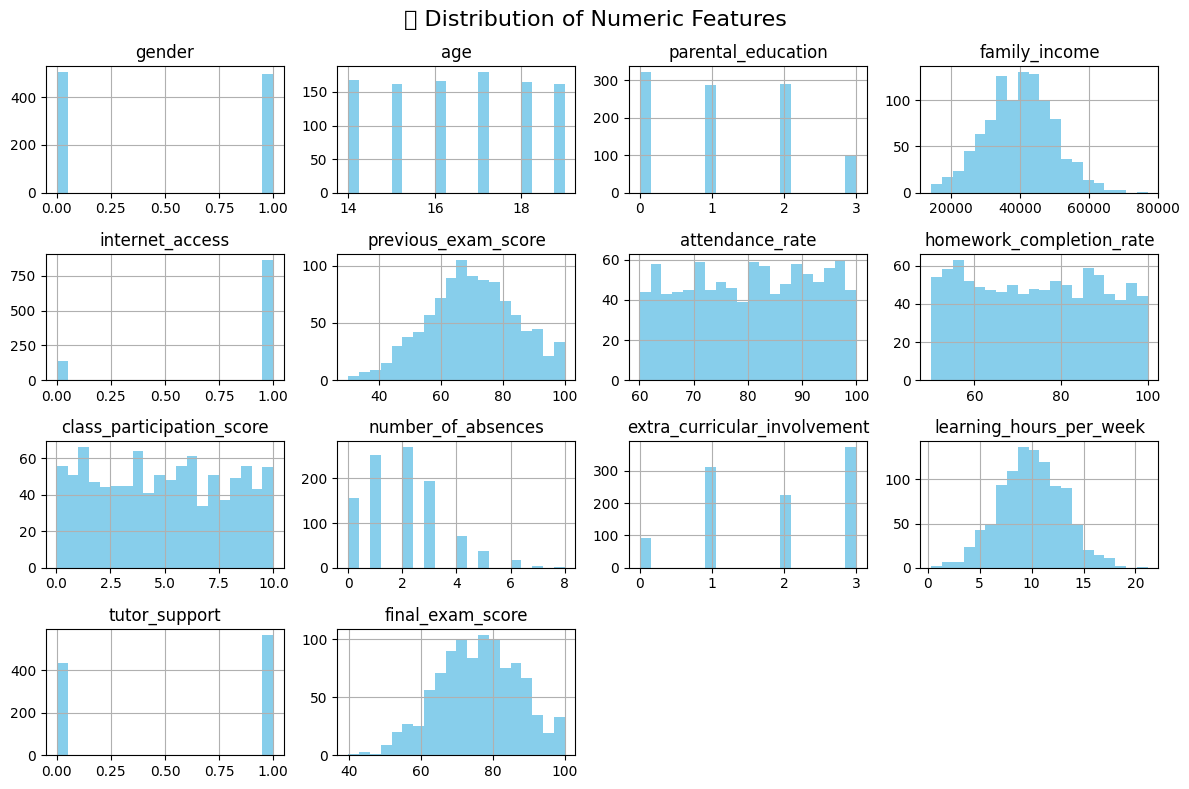

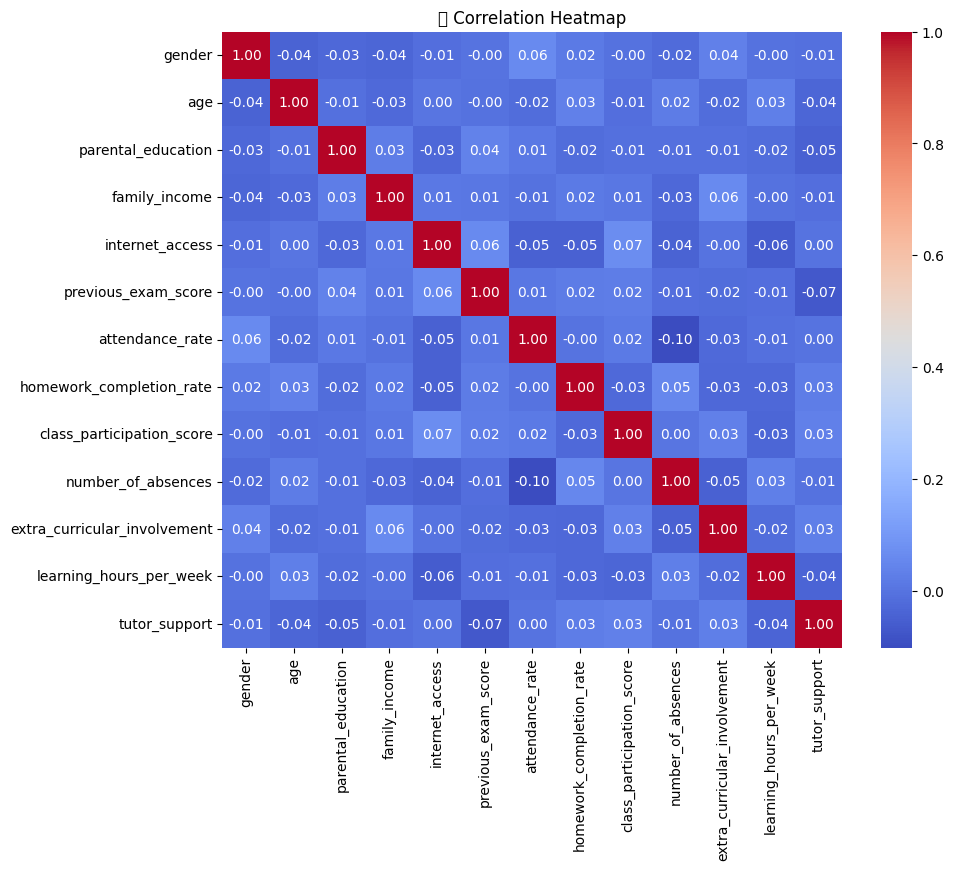

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#histogram
df.hist(figsize=(12, 8), bins=20, color='skyblue')
plt.suptitle('📊 Distribution of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('🔗 Correlation Heatmap')
plt.show()

# 3. Data Cleaning

In [ ]:
df['extra_curricular_involvement'] = df['extra_curricular_involvement'].fillna('None')

df.isnull().sum()

,0
gender,0
age,0
parental_education,0
family_income,0
internet_access,0
previous_exam_score,0
attendance_rate,0
homework_completion_rate,0
class_participation_score,0
number_of_absences,0


# 4. Encoding Categorical Values and Columns so that the Model can accept them

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['gender', 'parental_education', 'internet_access', 'extra_curricular_involvement', 'tutor_support']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Defining target (y) and features (X)

In [ ]:
# X basically has all columns except the target value final_exam_score, which are predicting btw
X = df.drop('final_exam_score', axis=1)

y = df['final_exam_score']

# 6. Train Test Split and Standardized Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Selecting and training the Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

Training on Scaled Data

In [ ]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

# 8. Prediciting Values using the Model and evaluating the predicted values

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Absolute Error: 4.442775303133643
Mean Squared Error: 31.053080242184986
R-squared: 0.7676840973311714


Predicting and evaluating scaled model

In [ ]:
y_pred_scaled = lr_scaled.predict(X_test_scaled)

print("Scaled Linear Regression Results:")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_scaled))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_scaled))
print("R-squared score:", r2_score(y_test, y_pred_scaled))

Scaled Linear Regression Results:
Mean Absolute Error: 4.442775303133658
Mean Squared Error: 31.05308024218487
R-squared score: 0.7676840973311723


# 9. Data Visualization

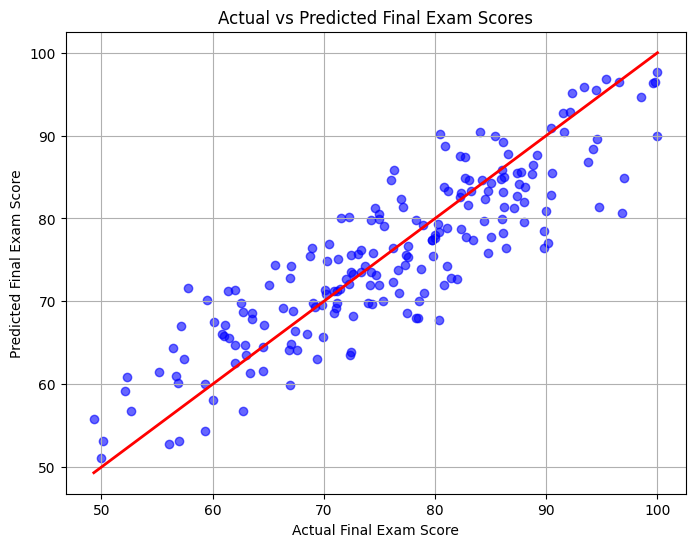

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Final Exam Score')
plt.ylabel('Predicted Final Exam Score')
plt.title('Actual vs Predicted Final Exam Scores')
plt.grid(True)
plt.show()

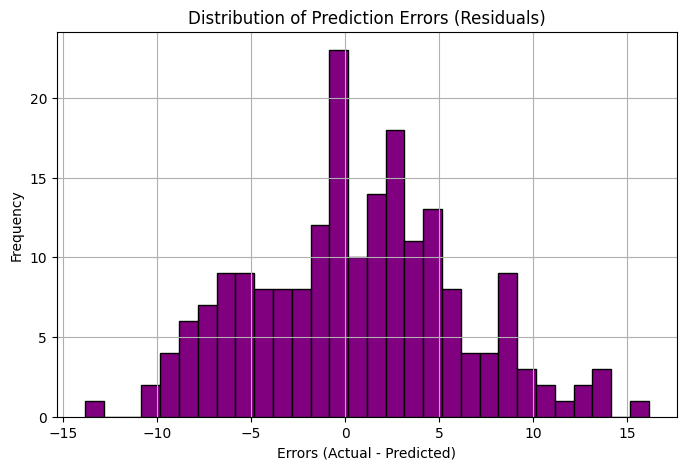

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Errors (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 10. Prediction Function for implementation

basically here I'm just making a prediction function that can be called to insert in some other method or function for the greater usage

In [ ]:
def predict_student_score(gender, age, parental_education, family_income, internet_access, previous_exam_score,
                          attendance_rate, homework_completion_rate, class_participation_score, number_of_absences,
                          extra_curricular_involvement, learning_hours_per_week, tutor_support):

    input_data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'parental_education': [parental_education],
        'family_income': [family_income],
        'internet_access': [internet_access],
        'previous_exam_score': [previous_exam_score],
        'attendance_rate': [attendance_rate],
        'homework_completion_rate': [homework_completion_rate],
        'class_participation_score': [class_participation_score],
        'number_of_absences': [number_of_absences],
        'extra_curricular_involvement': [extra_curricular_involvement],
        'learning_hours_per_week': [learning_hours_per_week],
        'tutor_support': [tutor_support]
    })

    for col in ['gender', 'parental_education', 'internet_access', 'extra_curricular_involvement', 'tutor_support']:
        input_data[col] = label_encoders[col].transform(input_data[col])

    # Make prediction
    predicted_score = lr.predict(input_data)[0]

    # Safely clip output
    return float(round(min(max(predicted_score, 0), 100), 2))

Sample prediction below:

In [ ]:
a = predict_student_score(
    gender='Female',
    age=14,
    parental_education='Graduate',
    family_income=4000,
    internet_access='No',
    previous_exam_score=28,
    attendance_rate=40,
    homework_completion_rate=44,
    class_participation_score=10,
    number_of_absences=6,
    extra_curricular_involvement='Moderate',
    learning_hours_per_week=2,
    tutor_support='No'
)

print("The predicted score for the given parameters is", a)

The predicted score for the given parameters is 40.21


# 11. Feature Importance Identification

Basically here I have identified what features of the dataset are most significant in describing the final prediction value

In [ ]:
import numpy as np

importance = np.abs(lr_scaled.coef_)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

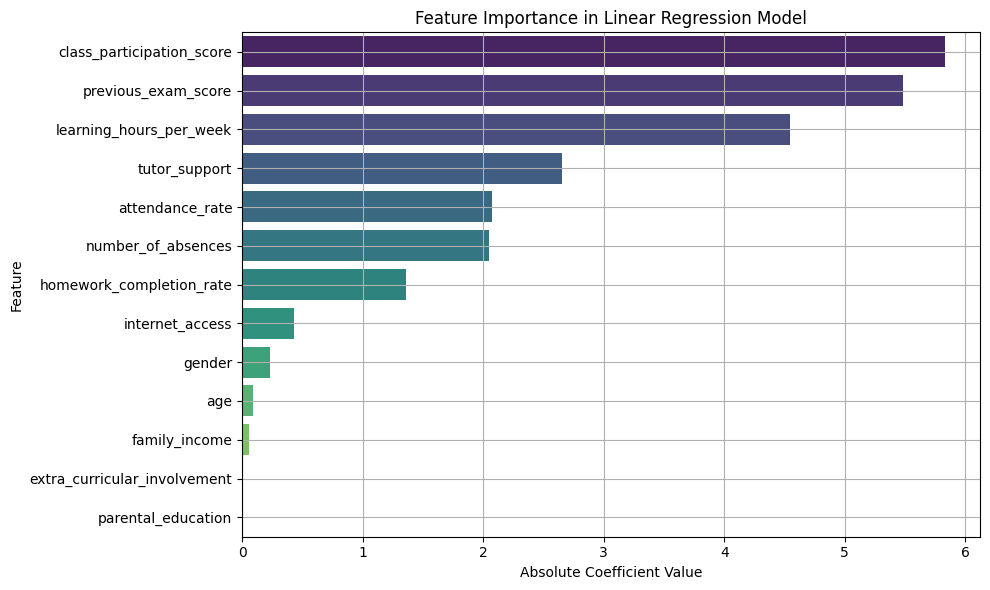

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

Here we can see that Class Participation of the student in question is most significant feature that determines what manner of marks they can produce, while the least significant is parental_education, which is a testament to how many bright people come from rather uneducated backgrounds and this paramenter barely matters in the overall prediction.

# 12. Miscellaneous Details

Note that for this project, a model besides Linear Regression was used. Namely RandomForest. However, it seems that the dataset is too shallow for it, and it is experiencing overfitting.

Thus, LinearRegression was determined to be the one best for this particular project and the dataset.

# **Conclusion**

In this project, a Student Performance Predictor was developed for EduQuest Coaching using a Linear Regression model. The model makes use of various factors like previous exam scores, attendance rates, class participation, and other student-related metrics to predict final exam scores with reasonably good accuracy.

The real value of this system lies in its ability to flag students who might be at risk of underperforming. This gives EduQuest a way to intervene early, adjust learning strategies, and offer additional support where needed. If implemented well, it could help improve overall academic outcomes and keep more students on track.